In [1]:
import os
os.chdir("..")
os.chdir("../src")
from tool_preprocess_onehot import state_df_zip, convert_to_str






os.chdir("../data")
import pandas as pd
df = pd.read_csv("quejas-clientes-limpio.csv", low_memory=False)


c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2]:
df

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,dias de retraso,weekday
0,1291006,Debt collection,Unknown or not specified,Communication tactics,Frequent or repeated calls,TX,76119,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,Unknown or not specified,0 days,Thursday
1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday
2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",Unknown or not specified,MA,2127,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes,0 days,Thursday
3,1291615,Credit card,Unknown or not specified,Other,Unknown or not specified,CA,92592,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,Unknown or not specified,0 days,Thursday
4,1292165,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,OH,43068,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,Unknown or not specified,0 days,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28151,1178184,Debt collection,Unknown or not specified,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201,2015-01-01,2015-01-01,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No,0 days,Thursday
28152,1178183,Consumer loan,Vehicle loan,Taking out the loan or lease,Unknown or not specified,GA,30043,2015-01-01,2015-01-01,DriveTime,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday
28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Unknown or not specified,MN,55105,2015-01-01,2015-01-01,Regions,Closed with non-monetary relief,Yes,No,0 days,Thursday
28154,1178181,Payday loan,Unknown or not specified,Can't stop charges to bank account,Unknown or not specified,CA,92509,2015-01-01,2015-01-01,Moneytree Inc,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday


Queremos predecir si tendra una timely response o no.
Segyun el EDA la compañia no tiene importancia, 
tampoco tiene sentido que dejemos las quejas que esten en progreso.


In [3]:
df.fillna("Unknown or not specified", inplace=True)

In [4]:
df["Consumer disputed?"].unique()

array(['Unknown or not specified', 'Yes', 'No'], dtype=object)

In [5]:
import datetime
df["Date received"] = pd.to_datetime(df["Date received"], format="%Y-%m-%d")
df["weekday"]=df["Date received"].dt.weekday

def obtener_dia_semana(numero_dia):
    dias_semana = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    
    return dias_semana[numero_dia]



In [6]:
df["weekday"]=df["weekday"].apply(obtener_dia_semana)
df["weekday"]

0        Thursday
1        Thursday
2        Thursday
3        Thursday
4        Thursday
           ...   
28151    Thursday
28152    Thursday
28153    Thursday
28154    Thursday
28155    Thursday
Name: weekday, Length: 28156, dtype: object

In [7]:
df=df.drop(columns=["Date received",	"Date sent to company",  "dias de retraso"])

df=df[df["Consumer disputed?"]!="Unknown or not specified"]

In [8]:
df.drop(columns=["Complaint ID", "ZIP code"], inplace=True)
df

,Product,Sub-product,Issue,Sub-issue,State,Company,Company response,Timely response?,Consumer disputed?,weekday
2,Mortgage,FHA mortgage,"Application, originator, mortgage broker",Unknown or not specified,MA,RBS Citizens,Closed with explanation,Yes,Yes,Thursday
6,Consumer loan,Installment loan,Managing the loan or lease,Unknown or not specified,OH,"CashCall, Inc.",Closed with explanation,Yes,Yes,Wednesday
9,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,TX,Cottonwood Financial Ltd.,Closed with explanation,Yes,Yes,Wednesday
14,Debt collection,"Other (phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,UT,Account Liquidation Services Inc.,Closed with non-monetary relief,Yes,Yes,Wednesday
22,Debt collection,Unknown or not specified,Improper contact or sharing of info,Contacted me after I asked not to,IL,"Municipal Collections Services, Inc.",Closed with explanation,Yes,Yes,Wednesday
...,...,...,...,...,...,...,...,...,...,...
28149,Credit reporting,Unknown or not specified,Improper use of my credit report,Report improperly shared by CRC,MI,Experian,Closed with explanation,Yes,No,Thursday
28150,Credit card,Unknown or not specified,Late fee,Unknown or not specified,AR,U.S. Bancorp,Closed with monetary relief,Yes,No,Thursday
28151,Debt collection,Unknown or not specified,Cont'd attempts collect debt not owed,Debt is not mine,TX,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No,Thursday
28153,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Unknown or not specified,MN,Regions,Closed with non-monetary relief,Yes,No,Thursday


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 2 to 28155
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product             6006 non-null   object
 1   Sub-product         6006 non-null   object
 2   Issue               6006 non-null   object
 3   Sub-issue           6006 non-null   object
 4   State               6006 non-null   object
 5   Company             6006 non-null   object
 6   Company response    6006 non-null   object
 7   Timely response?    6006 non-null   object
 8   Consumer disputed?  6006 non-null   object
 9   weekday             6006 non-null   object
dtypes: object(10)
memory usage: 516.1+ KB


In [10]:
X=df.drop(columns=["Consumer disputed?"])

In [11]:
y=df["Consumer disputed?"]

In [12]:
import optuna
from optuna import Trial

from optuna.distributions import IntDistribution, CategoricalDistribution, FloatDistribution

param = {
    "randomforestclassifier__n_estimators": IntDistribution(50, 5000),
    "randomforestclassifier__max_depth": IntDistribution(20, 45),
    "randomforestclassifier__min_samples_split": IntDistribution(2, 20),
    "randomforestclassifier__min_samples_leaf": IntDistribution(1, 20),
    "randomforestclassifier__max_features": CategoricalDistribution(["sqrt", "log2", None]),
    "randomforestclassifier__bootstrap": CategoricalDistribution([True, False]),
    "randomforestclassifier__class_weight": CategoricalDistribution(['balanced', 'balanced_subsample', None ]),

}

c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, OrdinalEncoder , OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline

# Identify feature types
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()




# Numeric preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing with type conversion fix


categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown or not specified')),  # opcional
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
model=RandomForestClassifier(random_state=42)

# Complete pipeline with ADASYN
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversampler', ADASYN(random_state=42)),
    ('randomforestclassifier', model)
])

# Train the pipeline

In [14]:
trained_preprocessor = model_pipeline.named_steps['preprocessor']


In [15]:
trained_preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 []),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Unknown '
                                                                           'or '
                                                                           'not '
                                                                           'specified',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Product', 'Sub-product', 'Issue',
                                  'Sub-issue', 'State', 'Company',
                                  'Company response', 'Timely response?',
                                  'weekday'])])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from optuna.integration import OptunaSearchCV

optuna_search = OptunaSearchCV(
    estimator=model_pipeline,
    param_distributions=param,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1_macro',
    n_trials=150,  # Number of trials/studies
    timeout=3600,  # Or set a time limit (in seconds)
    n_jobs=-1,
    verbose=2,
    random_state=42
)

optuna_search.fit(X_train, y_train)

C:\Users\unaif\AppData\Local\Temp\ipykernel_6228\3490046049.py:4: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(
[I 2025-08-07 13:28:22,838] A new study created in memory with name: no-name-4a96e45e-45d4-4197-91cf-2f0fb05b47d9
[I 2025-08-07 13:29:28,488] Trial 1 finished with value: 0.5952236836045798 and parameters: {'randomforestclassifier__n_estimators': 593, 'randomforestclassifier__max_depth': 31, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 18, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__bootstrap': False, 'randomforestclassifier__class_weight': 'balanced'}. Best is trial 1 with value: 0.5952236836045798.
[I 2025-08-07 13:30:32,357] Trial 3 finished with value: 0.5921729886155325 and parameters: {'randomforestclassifier__n_estimators': 663, 'randomforestclassifier__max_depth': 21, 'randomforestclassifi

In [ ]:
model_pipeline.set_params(**optuna_search.best_params_)
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown '
                                                                                            'or '
                                                                                            'not '
                                                                                            'specified',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product', 'Sub-product',
                                                   'Issue', 'Sub-issue',
                                                   'State', 'Company',
                                                   'Company response',
                                                   'Timely response?',
                                                   'weekday'])])),
                ('oversampler', ADASYN(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=27, max_features='log2',
                                        min_samples_leaf=6, n_estimators=4485,
                                        random_state=42))])

In [ ]:
"""import joblib
os.chdir("../models")
def convert_to_str(X):
    return X.astype(str)
model_pipeline=joblib.load("modelo_pipe_dispute_randomforest_onehot_company_def.pkl")"""

In [ ]:
y_probs = pd.DataFrame(model_pipeline.predict_proba(X_test)[:, 1])
y_probs

,0
0,0.627221
1,0.568199
2,0.646436
3,0.389387
4,0.565141
...,...
4800,0.533618
4801,0.548138
4802,0.627592
4803,0.494129


In [ ]:
y_pred = (y_probs[0] > 0.523).astype(int)
y_pred


0       1
1       1
2       1
3       0
4       1
       ..
4800    1
4801    1
4802    1
4803    0
4804    0
Name: 0, Length: 4805, dtype: int64

In [ ]:
y_pred.value_counts()

0
1    2795
0    2010
Name: count, dtype: int64

In [ ]:


y_test=pd.DataFrame(y_test).replace(to_replace=["Yes", "No"], value=[1, 0] )


C:\Users\unaif\AppData\Local\Temp\ipykernel_1892\2068250395.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test=pd.DataFrame(y_test).replace(to_replace=["Yes", "No"], value=[1, 0] )


Accuracy: 0.6031217481789802
f1 score: 0.7090770404271548
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.55      0.38      1045
           1       0.83      0.62      0.71      3760

    accuracy                           0.60      4805
   macro avg       0.56      0.58      0.54      4805
weighted avg       0.71      0.60      0.64      4805

[[0.5492823  0.4507177 ]
 [0.38191489 0.61808511]]
Confusion Matrix:


<Axes: >

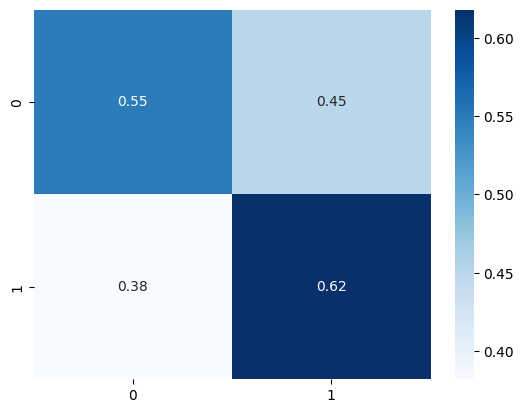

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from seaborn import heatmap
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"f1 score: {f1score}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred, normalize='true'))
print("Confusion Matrix:")
(heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, fmt=".2f", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1]))


In [ ]:
import os
os.chdir("..")
os.chdir("../src")
from tool_preprocess_onehot import state_df_zip, convert_to_str






os.chdir("../data")
import pandas as pd
df = pd.read_csv("quejas-clientes-limpio.csv", low_memory=False)


c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import numpy as np
thresholds = np.arange(.3, 1.01, 0.01)

best_threshold = 0
best_f1 = 0

for t in thresholds:
    # Convertir probabilidades en etiquetas según el threshold
    y_pred_t =  (y_probs[0] > t).astype(int)
    ()
    
    # Calcular F1 para ese threshold
    current_f1 = f1_score(y_test, y_pred_t)
    
    # Guardar si es mejor que el mejor hasta ahora
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = t

print(f"Mejor umbral (threshold) para F1: {best_threshold}")
print(f"Mejor F1 obtenido: {best_f1}")

Mejor umbral (threshold) para F1: 0.3
Mejor F1 obtenido: 0.8776154295733489


In [ ]:
import numpy as np
thresholds = np.arange(.3, 1.01, 0.01)

best_threshold = 0
best_f1 = 0

for t in thresholds:
    # Convertir probabilidades en etiquetas según el threshold
    y_pred_t =  (y_probs[0] > t).astype(int)
    ()
    
    # Calcular F1 para ese threshold
    current_f1 = accuracy_score(y_test, y_pred_t)
    
    # Guardar si es mejor que el mejor hasta ahora
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = t

print(f"Mejor umbral (threshold) para accuracy: {best_threshold}")
print(f"Mejor accuracy obtenido: {best_f1}")

Mejor umbral (threshold) para accuracy: 0.3
Mejor accuracy obtenido: 0.78210197710718


In [ ]:
from sklearn.model_selection import cross_validate
cross_val=cross_validate(model_pipeline, X_train, y_train, cv=10)["test_score"]

print(cross_val.mean())
print(cross_val.std())

0.7177548209366391
0.02515069668783778


In [ ]:
import os 
import pickle
os.chdir("../models")

"""with open('modelo_pipe_dispute_randomforest.pkl', 'wb') as f:
    pickle.dump(model_pipeline, f)"""

"with open('modelo_pipe_dispute_randomforest.pkl', 'wb') as f:\n    pickle.dump(model_pipeline, f)"

In [ ]:
...

In [ ]:
import dill
with open("modelo_pipe_dispute_randomforest_onehot_company_def.pkl", "r") as f:
    dill.dump(model_pipeline, f)

In [ ]:
import dill
with open("modelo_pipe_dispute_randomforest_onehot_company_def.pkl", "wb") as f:
    dill.dump(model_pipeline, f)

In [ ]:
trained_preprocessor.transform(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 53193 stored elements and shape (6006, 439)>

In [ ]:
dense_array = trained_preprocessor.transform(X).toarray()  # convert sparse to dense

# Create DataFrame
df = pd.DataFrame(trained_preprocessor.transform(X))

print(df.shape)
print(df.head())

(6006, 1)
                                                   0
0  <Compressed Sparse Row sparse matrix of dtype ...
1  <Compressed Sparse Row sparse matrix of dtype ...
2  <Compressed Sparse Row sparse matrix of dtype ...
3  <Compressed Sparse Row sparse matrix of dtype ...
4  <Compressed Sparse Row sparse matrix of dtype ...


In [ ]:
import pandas as pd

df_sparse = pd.DataFrame.sparse.from_spmatrix(trained_preprocessor.transform(X))
print(df_sparse.shape)
print(df_sparse.head())


(6006, 439)
   0    1    2    3    4    5    6    7    8    9    ...  429  430  431  432  \
0    0    0    0    0    0    0  1.0    0    0    0  ...    0    0  1.0    0   
1    0  1.0    0    0    0    0    0    0    0    0  ...    0    0  1.0    0   
2    0    0    0    0  1.0    0    0    0    0    0  ...    0    0  1.0    0   
3    0    0    0    0  1.0    0    0    0    0    0  ...  1.0    0  1.0    0   
4    0    0    0    0  1.0    0    0    0    0    0  ...    0    0  1.0    0   

   433  434  435  436  437  438  
0    0    0    0  1.0    0    0  
1    0    0    0    0    0  1.0  
2    0    0    0    0    0  1.0  
3    0    0    0    0    0  1.0  
4    0    0    0    0    0  1.0  

[5 rows x 439 columns]


In [ ]:
df_sparse


,0,1,2,3,4,5,6,7,8,9,...,429,430,431,432,433,434,435,436,437,438
0,0,0,0,0,0,0,1.0,0,0,0,...,0,0,1.0,0,0,0,0,1.0,0,0
1,0,1.0,0,0,0,0,0,0,0,0,...,0,0,1.0,0,0,0,0,0,0,1.0
2,0,0,0,0,1.0,0,0,0,0,0,...,0,0,1.0,0,0,0,0,0,0,1.0
3,0,0,0,0,1.0,0,0,0,0,0,...,1.0,0,1.0,0,0,0,0,0,0,1.0
4,0,0,0,0,1.0,0,0,0,0,0,...,0,0,1.0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6001,0,0,0,1.0,0,0,0,0,0,0,...,0,0,1.0,0,0,0,0,1.0,0,0
6002,0,0,1.0,0,0,0,0,0,0,0,...,0,0,1.0,0,0,0,0,1.0,0,0
6003,0,0,0,0,1.0,0,0,0,0,0,...,1.0,0,1.0,0,0,0,0,1.0,0,0
6004,0,0,0,0,0,0,1.0,0,0,0,...,1.0,0,1.0,0,0,0,0,1.0,0,0
